## Capstone Project

Online Payments Fraud Detection Machine Learning Project using data Blossom Bank Plc as a case study

## Problem Definition
Fraud is a major challenge which results in Financial losses, disputes, customer dissatisfaction and reputational damage to the affected Financial institution whenever it occurs.As result of the large volume of transactional data invoved, Machine Level models is the best option for dealing with this challenge.The aim of this project, therefore, is to build a Machine Learning Model that can automatically and proactively predict and identify fraudulent online payment transactions more accurately thereby improving customer patrongate and higher return on investments.

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data set

data = pd.read_csv(r'C:\Users\hp\Downloads\Online Payment Fraud Detection.csv')

## Inspecting the data / Exploratory Data Analysis

In [3]:
# View the first five rows of the dataframe
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
# checking for missing values

data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# Checking out for unique items
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
# Counting the number of unknown values in the data. The output shows that there is no unkown value.
data[data =='unknown'].count().to_frame()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## Data Visualization
In this section, I tried visualizing some relationships in the data set.


### Univariate Analysis

In [10]:
# Activating the seaborn visualization function

sns.set()

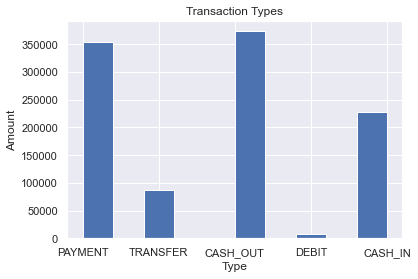

In [11]:
#univariate analysis cells 
# Visualizing the total payments types
plt.hist(x='type',data=data )
plt.title('Transaction Types')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.show()

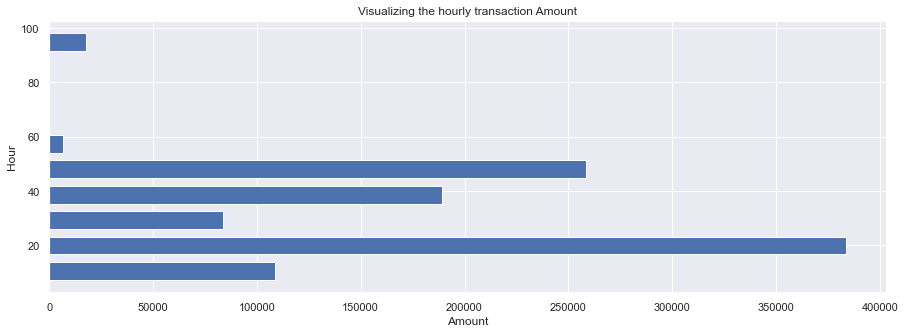

In [12]:
#univariate analysis cells
plt.figure(figsize= (15,5))
plt.hist(x='step',data=data,orientation='horizontal', rwidth=0.7,align='right')
plt.xlabel('Amount')
plt.ylabel('Hour')
plt.title('Visualizing the hourly transaction Amount')
plt.show()

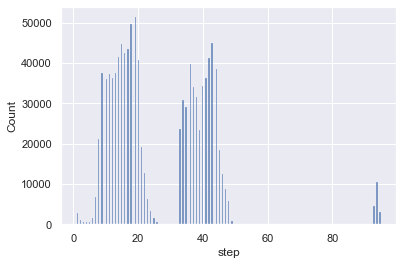

In [13]:
# Visualizing hourly transaction count
sns.histplot(data=data,x='step')
plt.show()

<AxesSubplot:title={'center':'Missing Data'}>

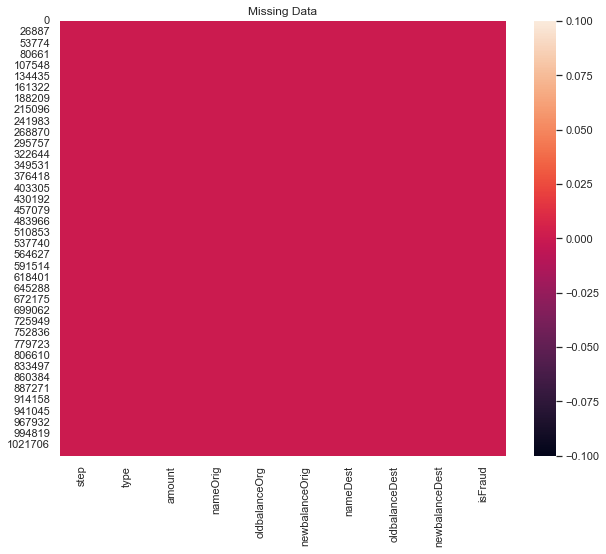

In [14]:
# visualise the missing values
# No missing value
plt.figure(figsize=(10,8))
plt.title('Missing Data')
sns.heatmap(data.isnull())

<AxesSubplot:>

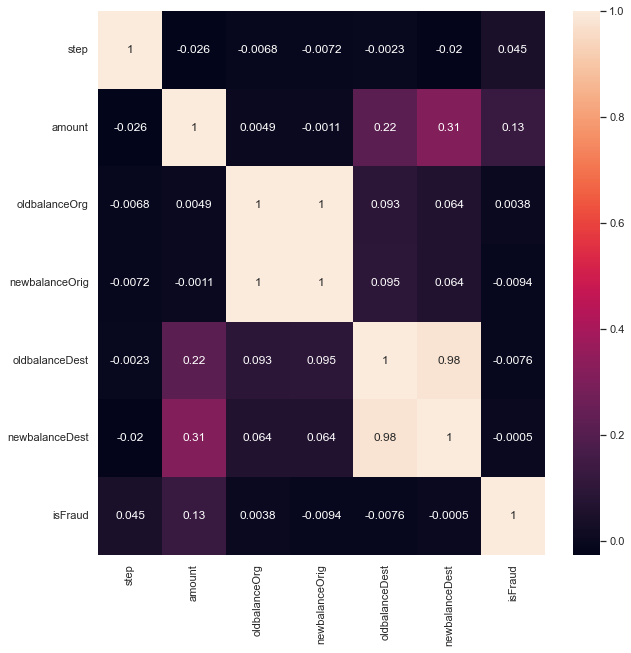

In [15]:
# Correlation heatmap showing relationships between the variables in the fraud data
# There is a strong correlation between old balance the recipient and the new balance after the transaction.
fig, ax = plt.subplots(figsize=(10,10))
corel = data.corr()
sns.heatmap(corel,annot=True)

### bivariate analysis cells


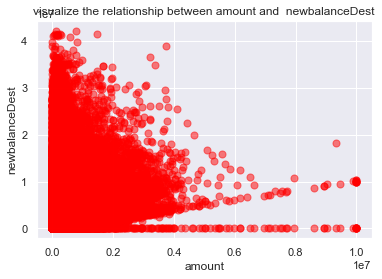

In [16]:
# create the scatter plot between amount and  newbalanceDest
plt.scatter(data['amount'], data['newbalanceDest'], s=50, c='red', alpha=0.5)

# add a title and axis labels
plt.title('visualize the relationship between amount and  newbalanceDest')
plt.xlabel('amount')
plt.ylabel('newbalanceDest')

# show the plot
plt.show()

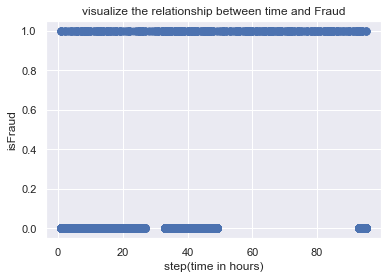

In [17]:
# create the scatter plot between time and Fraud
plt.scatter(data['step'], data['isFraud'], s=50, alpha=0.5)

# add a title and axis labels
plt.title('visualize the relationship between time and Fraud')
plt.xlabel('step(time in hours)')
plt.ylabel('isFraud')

# show the plot
plt.show()

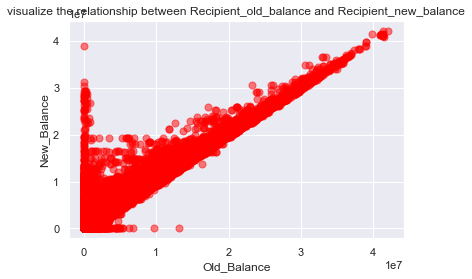

In [18]:
# create the scatter plot between Recipient_old_balance and Recipient_new_balance
plt.scatter(data['oldbalanceDest'], data['newbalanceDest'], s=50, c='red', alpha=0.5)

# add a title and axis labels
plt.title('visualize the relationship between Recipient_old_balance and Recipient_new_balance')
plt.xlabel('Old_Balance')
plt.ylabel('New_Balance')

# show the plot
plt.show()

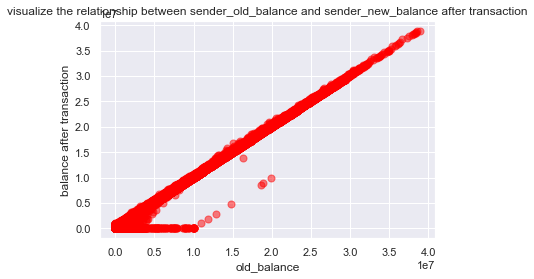

In [19]:

# create the scatter plot sender_old_balance and sender_new_balance after transaction
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], s=50, c='red', alpha=0.5)

# add a title and axis labels
plt.title('visualize the relationship between sender_old_balance and sender_new_balance after transaction')
plt.xlabel('old_balance')
plt.ylabel('balance after transaction')

# show the plot
plt.show()

In [20]:
# get a summary of the data contained in the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [21]:
#Distribution of target variable

data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

## Using Count Encoding for the categorical values

In [22]:
#Encoding the type column
data['type_encoded'] = data['type'].map(data['type'].value_counts())

# View the data with the new count encoded column
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,353873
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,353873
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,86753
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,373641
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,353873


In [23]:
#Encoding the nameOrig column
data['nameOrig_encoded'] = data['nameOrig'].map(data['nameOrig'].value_counts())

# View the data with the new count encoded column
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded,nameOrig_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,353873,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,353873,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,86753,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,373641,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,353873,1


In [24]:
# #Encoding the nameDest_encoded column
data['nameDest_encoded'] = data['nameDest'].map(data['nameDest'].value_counts())

# View the data with the new count encoded column
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,353873,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,353873,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,86753,1,26
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,373641,1,27
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,353873,1,1


In [25]:
# Drop the encoded columns
data.drop(['type','nameOrig','nameDest'],axis =1, inplace= True)


In [26]:
# Visualise the dataframe with the encoded columns to confirm removal of the old columns
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,353873,1,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,353873,1,1
2,1,181.00,181.0,0.00,0.0,0.0,1,86753,1,26
3,1,181.00,181.0,0.00,21182.0,0.0,1,373641,1,27
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,353873,1,1


In [27]:
# Visualise the number of rows and columns 
print(data.shape)

(1048575, 10)


Data Dictionary
The below column reference:
• step: represents a unit of time where 1 step equals 1
hour
• type: type of online transaction
• amount: the amount of the transaction
• nameOrig: customer starting the transaction
• oldbalanceOrg: balance before the transaction
• newbalanceOrig: balance after the transaction
• nameDest: recipient of the transaction
• oldbalanceDest: initial balance of recipient
before the transaction
• newbalanceDest: the new balance of the
recipient after the transaction
• isFraud: fraud transaction

## Selecting the Target



In [28]:
y = data['isFraud']

In [29]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

<AxesSubplot:ylabel='isFraud'>

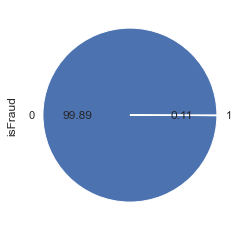

In [30]:
# Visualizing the percentage of transactions marked as fraudulent in the dataset
y.value_counts().plot(kind='pie',autopct='%.2f')


## Selecting the features

In [31]:
# Selecting and visualising the features

X = data.drop(['isFraud'], axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,353873,1,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,353873,1,1
2,1,181.00,181.0,0.00,0.0,0.0,86753,1,26
3,1,181.00,181.0,0.00,21182.0,0.0,373641,1,27
4,1,11668.14,41554.0,29885.86,0.0,0.0,353873,1,1


## Train Test Split

## Import ML algorithms and initialize them

In [32]:
#importing the necessary libraries 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Split the data into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
# Initialize models
DC = DecisionTreeClassifier()
RF = RandomForestClassifier(random_state=42)

In [35]:
# Passing the models into list "models"

models =[DC,RF]

In [36]:
print('\n',X_train.shape)
print('\n',X_test.shape)
print('\n',y_train.shape)
print('\n',y_test.shape)


 (734002, 9)

 (314573, 9)

 (734002,)

 (314573,)


In [37]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    print('\nFor {}, Confusion Matrix is\n {} '.format(models.__class__.__name__,confusion_matrix(y_test, prediction)))
 

In [38]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)



For DecisionTreeClassifier, Accuracy score is 0.9995708468304654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314212
           1       0.82      0.81      0.81       361

    accuracy                           1.00    314573
   macro avg       0.91      0.90      0.91    314573
weighted avg       1.00      1.00      1.00    314573


For list, Confusion Matrix is
 [[314146     69]
 [    66    292]] 

For RandomForestClassifier, Accuracy score is 0.9997584026601138 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314279
           1       0.80      0.98      0.88       294

    accuracy                           1.00    314573
   macro avg       0.90      0.99      0.94    314573
weighted avg       1.00      1.00      1.00    314573


For list, Confusion Matrix is
 [[314209      6]
 [    70    288]] 


## Interpret Results
Interpret the results by assessing accuracy score, precision score and recall score
1. The DecisionTreeClassifier Model has an accuracy score of 0.999570, precision of 0.82 and recall of 0.81.

2. The RandomForestClassifier has an accuracy score of 0.999758, precision of 0.80 and recall of 0.98.

The two models produced good results but RandomForestClassifier should be deployed as it outperformed the other model with an accuracy score of 0.999758 and a recall value of 0.98
